In [1]:
#@ INITIALIZATION:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Mounted at /content/gdrive


In [4]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES:
from fastbook import *                     # Getting all the Libraries.
from fastai.vision.widgets import *        # Getting all the Libraries.
#@ IGNORING WARNINGS:
import warnings
warnings.filterwarnings("ignore")

In [17]:
import requests
import re
import json
from PIL import Image
from io import BytesIO
import os

# Function for extracting image URLs from DuckDuckGo
def search_images_DDG(query, max_n=10):
    url = 'https://duckduckgo.com/'
    params = {'q': query}
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
    }

    # Send POST request to obtain the vqd token
    res = requests.post(url, data=params, headers=headers)
    searchObj = re.search(r'vqd=([\d-]+)\&', res.text)
    if not searchObj:
        print('Token Parsing Failed!')
        return None

    vqd = searchObj.group(1)
    requestUrl = f"{url}i.js"
    params = {
        'l': 'us-en',
        'o': 'json',
        'q': query,
        'vqd': vqd,
        'f': ',,,',
        'p': '1',
        'v7exp': 'a'
    }

    urls = []
    while len(urls) < max_n:
        try:
            res = requests.get(requestUrl, headers=headers, params=params)
            data = json.loads(res.text)
            for obj in data['results']:
                urls.append(obj['image'])
                if len(urls) >= max_n:
                    break
            if 'next' not in data:
                break
            requestUrl = url + data['next']
        except Exception as e:
            print(f"Error occurred: {e}")
            break

    return urls

In [18]:
urls = search_images_DDG("grizzly bear", max_n=100)
len(urls), urls[0]

(100,
 'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg')

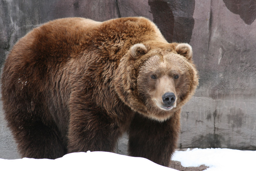

In [19]:

#@ INSPECTING THE IMAGES:
dest = Path("./images")                      # Initializing Destination for Images.
if dest.exists():                            # Inspecting Destination.
    os.remove(dest)
download_url(urls[0], dest)                  # Downloading the Images.
img = Image.open(dest)                       # Inspecting the Image.
img.thumbnail((256, 256))                    # Inspecting the Image.
img

In [22]:
#@ Getting data:
bear_types='grizzly', 'black', 'teddy' #initializing types of bear
PATH=Path('/content/bears')

if not PATH.exists():
  PATH.mkdir()
  for o in bear_types:
    dest=(PATH/o)  # destination
    dest.mkdir(exist_ok=True)
    urls=search_images_DDG(f'{o} bear')
    download_images(dest, urls=urls)

In [23]:
#@ Inspecting the dataset:
fnames=get_image_files(PATH)
fnames[0:2]

(#0) []

In [24]:
#@ Inspecting corrupted files:
failed=verify_images(fnames)
failed.map(Path.unlink);
len(failed)

0